## Downloading and Exploring Snow Today's Snow Data

This tutorial is the first in a series of tutorials intended to walk you through downloading, accessing, processing, and visualizing the National Snow and Ice Data Center's (NSIDC) Snow Today's (https://nsidc.org/reports/snow-today) snow cover and albedo datasets. For the sake of these tutorials, we'll be using 19 year's (2001-2019) worth of snow cover and albedo datasets for the Sierra Nevada Mountain Range. This tutorial includes steps to: 
1. Download snow cover and albedo datasets 
2. Access snow cover and albedo data/metadata
3. Create basic visualizations of the datasets

## Table of Contents

 ####  [Download Snow Cover and Albedo Datasets](#bullet1)
 * [Calculate Monthly Snow Cover Averages](#bullet2)
 * [Calculate Snow Cover Anomolies Per Month Per Year](#bullet5)
 * [Select Indivdual Snow Cover Years and Months](#bullet6)
 #### [Process Albedo Data](#bullet7)
 * [Calculate Monthly Albedo Averages](#bullet8)
 * [Calculate Albedo Anomalies Per Month Per Year](#bullet10)
 * [Select Indivdual Years and Months for Albedo](#bullet11)
 #### [Convert Datasets to GeoTIFF](#bullet12)
 * [Define Geospatial Inputs](#bullet3)
 * [Convert Array to Geotiff](#bullet13)
 * [Convert Stacked Array into Multiple Geotiffs](#bullet14)
 * [Transform Geotiff to WGS84 Coordinate System](#bullet15)
 * [Transform Geotiff to NetCDF File](#bullet16)
 #### [Plot Geotiffs Using Leafmap](#bullet17)

## Downloading Snow Cover and Albedo Datasets
Snow cover and albedo datasets are stored the Hierarchial Data Format version 5 (HDF5), meaning that datasets are stored with file structure made of groups and datasets. Each dataset is stored as a 3-dimensional matrix, where the first dimension is days of the current water year, x-dim, y-dim. Note: water years begin on October-1 of the previous year (e.g., Sierra2001.h5 dataset starts at day 2000-10-01). 

In [ ]:
# Used to download the h5 files 
import wget
import os
# Used to move datasets to specified folder
import shutil

### Download Sierra Snow Cover Datasets

To manually download Sierra snow cover datasets, please visit: https://snow.ucsb.edu/products/SPIRES/Sierra/

In [ ]:
# Choose which years of data to download (from 2001 to 2019)
# Note: 2001-2019 is about 7gbs worth of data and can take several minutes to download. 

start_year = 2001
end_year = 2019
# Choose which directory you'd like save your datasets in.
# / is needed to ensure that file path is absolute
target_dir = 'snow_cover/'
for i in range(start_year, end_year + 1):
    filename =  'Sierra'+str(i)+'.h5'
    # Pulls dataset from link 
    url = 'https://snow.ucsb.edu/products/SPIRES/Sierra/Sierra'+str(i)+'.h5'
    # Downloads dataset
    wget.download(url)
    # Moves dataset to specified file path
    shutil.move(filename, os.path.join(target_dir, filename))

### Download Albedo Datasets

To manually download Sierra albedo datasets, please visit: https://snow.ucsb.edu/products/SPIRES/SierraAlbedo/

In [ ]:
# Note: 2001-2019 is about 7gb and can take several minutes to download. 
# Choose which years of data to download (from 2001 to 2019)
start_year = 2001
end_year = 2019
target_dir = 'albedo/'
for i in range(start_year, end_year + 1):
    filename = 'SierraAlbedo' + str(i) + '.h5'
    url = 'https://snow.ucsb.edu/products/SPIRES/SierraAlbedo/SierraAlbedo'+str(i)+'.h5'
    wget.download(url)
    shutil.move(filename, os.path.join(target_dir, filename))

## Opening HDF5 Datasets Four Different Ways

In [79]:
import glob
import h5py
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import xarray as xr 
import rioxarray 
import rasterio as rio
from matplotlib.pyplot import *

Now that we've downloaded our datasets, we can 

In [5]:
snow_cover_ds = glob.glob('snow_cover/*.h5')
snow_cover_ds

['snow_cover\\Sierra2001.h5',
 'snow_cover\\Sierra2002.h5',
 'snow_cover\\Sierra2003.h5',
 'snow_cover\\Sierra2004.h5',
 'snow_cover\\Sierra2005.h5',
 'snow_cover\\Sierra2006.h5',
 'snow_cover\\Sierra2007.h5',
 'snow_cover\\Sierra2008.h5',
 'snow_cover\\Sierra2009.h5',
 'snow_cover\\Sierra2010.h5',
 'snow_cover\\Sierra2011.h5',
 'snow_cover\\Sierra2012.h5',
 'snow_cover\\Sierra2013.h5',
 'snow_cover\\Sierra2014.h5',
 'snow_cover\\Sierra2015.h5',
 'snow_cover\\Sierra2016.h5',
 'snow_cover\\Sierra2017.h5',
 'snow_cover\\Sierra2018.h5',
 'snow_cover\\Sierra2019.h5']

In [32]:
sierra2001 = h5py.File(snow_cover_ds[0], 'r')
sierra2001.visit(print)

Grid
Grid/MODIS_GRID_500m
Grid/MODIS_GRID_500m/dust
Grid/MODIS_GRID_500m/grain_size
Grid/MODIS_GRID_500m/raw_snow_fraction
Grid/MODIS_GRID_500m/snow_fraction


In [ ]:
sierra2001['Grid']['MODIS_GRID_500m']['snow_fraction']

In [ ]:
for meta in sierra2001.attrs.keys():
    print(meta)
    print (sierra2001.attrs[meta])

In [ ]:
for meta in sierra2001['Grid'].attrs.keys():
    print(meta)
    print (sierra2001['Grid'].attrs[meta])

In [31]:
for meta in sierra2001['Grid']['MODIS_GRID_500m'].attrs.keys():
    print(meta)
    print (sierra2001['Grid']['MODIS_GRID_500m'].attrs[meta])

ReferencingMatrix
[[ 0.0000e+00  5.0000e+02 -2.8575e+05]
 [-5.0000e+02  0.0000e+00  5.0025e+05]]


In [35]:
for meta in sierra2001['Grid']['MODIS_GRID_500m']['snow_fraction'].attrs.keys():
    print(meta)
    print (sierra2001['Grid']['MODIS_GRID_500m']['snow_fraction'].attrs[meta])

divisor
[100.]


In [45]:
sierra2002 = rio.open(snow_cover_ds[1])
sierra2002.subdatasets

['HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/dust',
 'HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/grain_size',
 'HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/raw_snow_fraction',
 'HDF5:snow_cover\\Sierra2002.h5://Grid/MODIS_GRID_500m/snow_fraction']

In [51]:
sierra2002.tags()

{'Grid_angleunits': 'degrees',
 'Grid_aspect': 'normal',
 'Grid_falseeasting': '0 ',
 'Grid_falsenorthing': '-4000000 ',
 'Grid_geoid': '6378137 0.0818191908426215 ',
 'Grid_maplatlimit': '-90 90 ',
 'Grid_maplonlimit': '-255 15 ',
 'Grid_mapparallels': '34 40.5 ',
 'Grid_mapprojection': 'eqaconicstd',
 'Grid_MODIS_GRID_500m_dust_divisor': '10 ',
 'Grid_MODIS_GRID_500m_grain_size_divisor': '1 ',
 'Grid_MODIS_GRID_500m_raw_snow_fraction_divisor': '100 ',
 'Grid_MODIS_GRID_500m_ReferencingMatrix': '0 500 -285750 -500 0 500250 ',
 'Grid_MODIS_GRID_500m_snow_fraction_divisor': '100 ',
 'Grid_nparallels': '2 ',
 'Grid_origin': '0 -120 0 ',
 'Grid_scalefactor': '1 ',
 'Grid_trimlat': '-90 90 ',
 'Grid_trimlon': '-135 135 ',
 'ISOdates': '2001274 2001275 2001276 2001277 2001278 2001279 2001280 2001281 2001282 2001283 2001284 2001285 2001286 2001287 2001288 2001289 2001290 2001291 2001292 2001293 2001294 2001295 2001296 2001297 2001298 2001299 2001300 2001301 2001302 2001303 2001304 2001305 20

In [52]:
sierra2002.tags()['Grid_MODIS_GRID_500m_ReferencingMatrix']

'0 500 -285750 -500 0 500250 '

In [57]:
sierra_snow_cover_2003 = rioxarray.open_rasterio(snow_cover_ds[2])
sierra_snow_cover_2003

C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\rmunn\Anaconda3\envs\eds223\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwar

<xarray.Dataset>
Dimensions:                                 (y: 1334, x: 1841, band: 365)
Coordinates:
  * y                                       (y) float64 0.5 1.5 ... 1.334e+03
  * x                                       (x) float64 0.5 1.5 ... 1.84e+03
  * band                                    (band) int32 1 2 3 4 ... 363 364 365
    spatial_ref                             int32 0
Data variables:
    Grid_MODIS_GRID_500m_dust               (band, y, x) uint16 ...
    Grid_MODIS_GRID_500m_grain_size         (band, y, x) uint16 ...
    Grid_MODIS_GRID_500m_raw_snow_fraction  (band, y, x) uint8 ...
    Grid_MODIS_GRID_500m_snow_fraction      (band, y, x) uint8 ...
Attributes: (12/21)
    Grid_angleunits:                                 degrees
    Grid_aspect:                                     normal
    Grid_falseeasting:                               0
    Grid_falsenorthing:                              -4000000
    Grid_geoid:                                      6378137 0.0818191908426215 
    Grid_maplatlimit:                                -90 90 
    ...                                              ...
    Grid_origin:                                     0 -120 0 
    Grid_scalefactor:                                1
    Grid_trimlat:                                    -90 90 
    Grid_trimlon:                                    -135 135 
    ISOdates:                                        2002274 2002275 2002276 ...
    MATLABdates:                                     731490 731491 731492 731...

In [58]:
sierra_snow_cover_2003.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                                 (y: 1334, x: 1841, band: 365)
Coordinates:
  * y                                       (y) float64 0.5 1.5 ... 1.334e+03
  * x                                       (x) float64 0.5 1.5 ... 1.84e+03
  * band                                    (band) int32 1 2 3 4 ... 363 364 365
    spatial_ref                             int32 0
Data variables:
    Grid_MODIS_GRID_500m_dust               (band, y, x) uint16 ...
    Grid_MODIS_GRID_500m_grain_size         (band, y, x) uint16 ...
    Grid_MODIS_GRID_500m_raw_snow_fraction  (band, y, x) uint8 ...
    Grid_MODIS_GRID_500m_snow_fraction      (band, y, x) uint8 ...
Attributes: (12/21)
    Grid_angleunits:                                 degrees
    Grid_aspect:                                     normal
    Grid_falseeasting:                               0
    Grid_falsenorthing:                              -4000000
    Grid_geoid:                   

In [ ]:
sierra_snow_cover_2003.dims

In [ ]:
# dataset global attributes
sierra_snow_cover_2003.attrs

In [66]:
# select one variable and pick the first entry along the first axis (day 1)
snow_cover = sierra_snow_cover_2003.Grid_MODIS_GRID_500m_snow_fraction[0]

## GDAL 

In [74]:
# Get subdatasets of first snow fraction dataset ('Sierra2001.h5').
sierra_snow_cover_2004 = gdal.Open(snow_cover_ds[3], gdal.GA_ReadOnly).GetSubDatasets()

#(sds[3] is to choose the 4th dataset in the subdirectory (i.e., snow fraction). 
#The second bracket [0] is needed to open the dataset.
snow_fraction_2004 = gdal.Open(sierra_snow_cover_2004[3][0])

#Changes the selected dataset into an array.
snow_fraction_2004_array = snow_fraction_2004.ReadAsArray()

np.shape(snow_fraction_2004_array)

(366, 1334, 1841)

In [ ]:
snow_fraction_2004.GetMetadata()

In [76]:
snow_fraction_2004_t = np.transpose(snow_fraction_2004_array)
np.shape(snow_fraction_2004_t)

(1841, 1334, 366)

In [78]:
#pull data for first day of dataset
snow_2004_day_200 = snow_fraction_2004_t[:,:,200]
#Confirm shape is 2d
np.shape(snow_2004_day_200)

(1841, 1334)

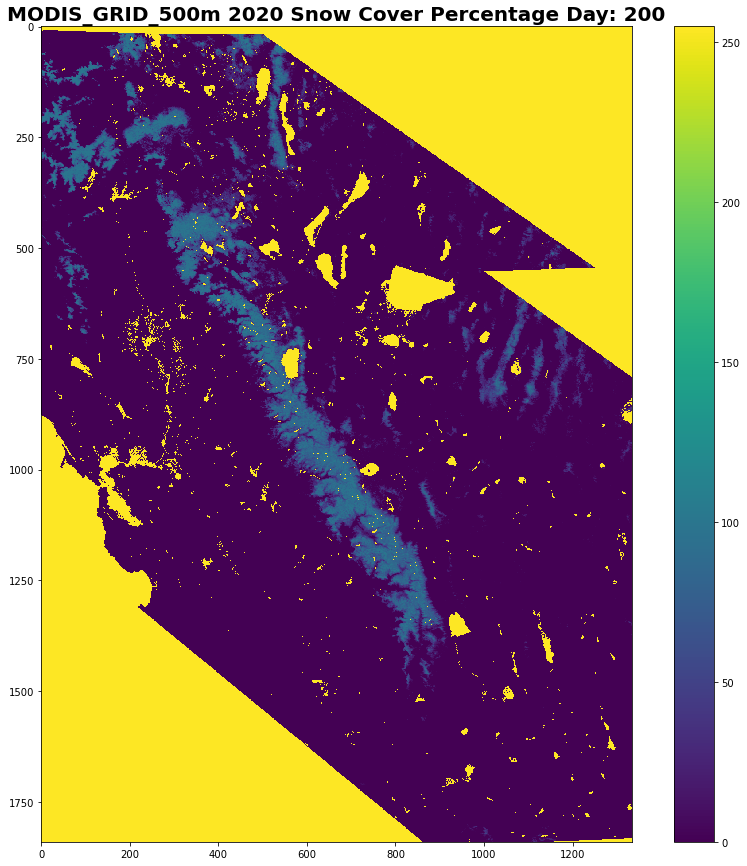

In [80]:
figure(figsize=(15, 15))
plt.imshow(snow_2004_day_200,interpolation = 'nearest')
plt.title('MODIS_GRID_500m 2020 Snow Cover Percentage Day: 200', fontsize = 20, fontweight='bold')
plt.colorbar()

In [81]:
snow_2004_day_200_float = snow_2004_day_200.astype('float')
snow_2004_day_200_float[snow_2004_day_200_float == 255] = 0

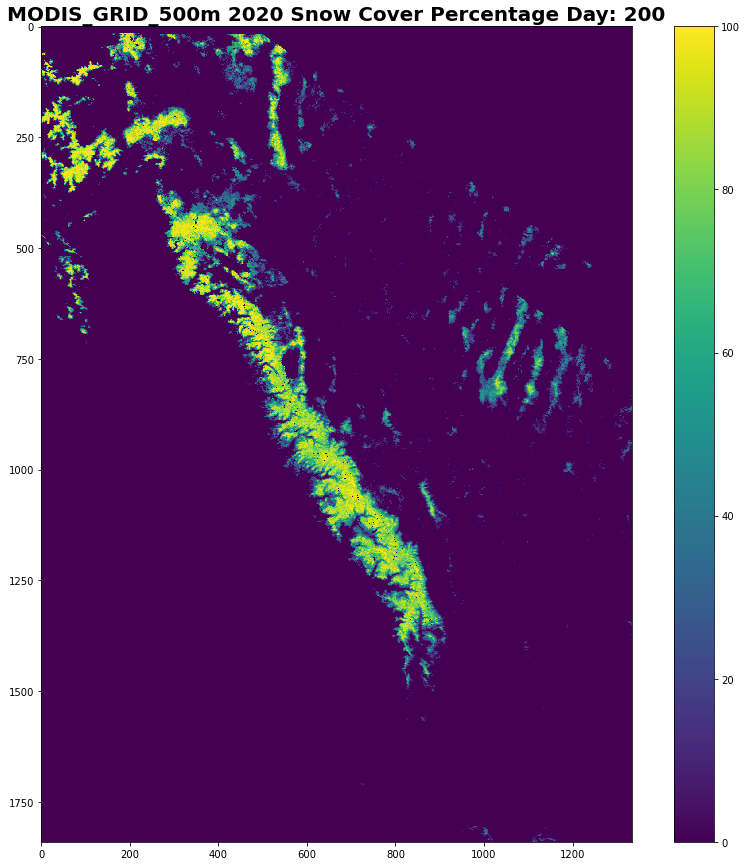

In [82]:
figure(figsize=(15, 15))
plt.imshow(snow_2004_day_200_float, interpolation = 'nearest')
plt.title('MODIS_GRID_500m 2020 Snow Cover Percentage Day: 200', fontsize = 20, fontweight='bold')
plt.colorbar()

## For Looping Yearly Snow Cover 

In [83]:
import os
import imageio

In [92]:

snow_fraction_2004_float = snow_fraction_2004_t.astype('float')
snow_fraction_2004_float[snow_fraction_2004_float == 255] = 0 
    
# Create an empty list.
filenames = []
    
for i in range(len(snow_fraction_2004_array)):
    # 3rd dimension is day. 
    total_d = snow_fraction_2004_float[:,:,i] 
    plt.figure(figsize=(15, 15))
    plt.imshow(total_d, interpolation = 'nearest')
    plt.title('Sierra 2004 Snow Cover Day: ' + str(i), fontsize = 20, fontweight='bold')
        
    filename = f'{i}.png'
    filenames.append(filename)
        
    # save frame
    plt.savefig(filename)
    plt.close()
        
            
with imageio.get_writer('2004 Sierra Snow.gif', mode='I') as writer:
    for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    for filename in set(filenames):
        os.remove(filename)